In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
np.random.seed(42)  
num_examples = 250
exam_1 = np.random.randint(0, 11, num_examples)
exam_2 = np.random.randint(0, 11, num_examples)

labels = np.where(exam_1 + exam_2 >= 10, 1, 0)

X_train = np.vstack((exam_1, exam_2))
y_train = labels.reshape(1, -1)

X_train.T[:5], y_train.T[:5] 

(array([[ 6,  9],
        [ 3,  8],
        [10,  3],
        [ 7,  0],
        [ 4,  1]], dtype=int32),
 array([[1],
        [1],
        [1],
        [0],
        [0]]))

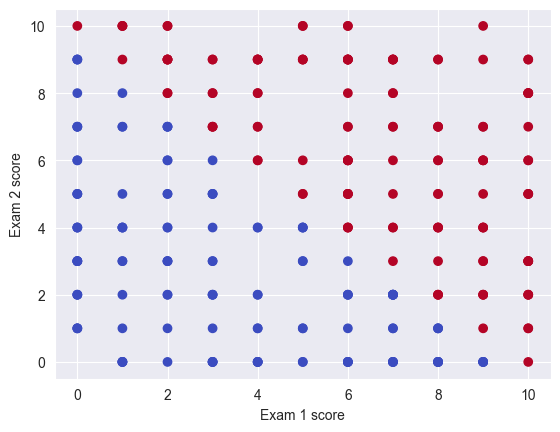

In [125]:
plt.scatter(X_train[0], X_train[1], c=y_train.ravel(), cmap='coolwarm')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [126]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [127]:
def initialize_params(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [128]:
def propagation(w, b, X, y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    dw = 1/m * np.dot(X, (A - y).T)
    db = 1/m * np.sum(A - y)
    return dw, db, cost

In [129]:
def optimize(w, b, X, y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, X, y)
        w -= learning_rate * dw
        b -= learning_rate * db
        costs.append(cost)
        if i % 100 == 0:
            print(f'Cost after iteration {i}: {cost}')
    return w, b, costs

In [130]:
def predict(w, b, X):
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    A = sigmoid(np.dot(w.T, X) + b)
    y_pred = np.where(A >= 0.5, 1, 0)
    return y_pred

In [131]:
def model(X_train, y_train, num_iterations, learning_rate):
    w, b = initialize_params(X_train.shape[0])
    w, b, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate)
    return w, b, costs

In [132]:
w, b, costs = model(X_train, y_train, 10000, 0.01)

Cost after iteration 0: 0.6931471805599454
Cost after iteration 100: 0.6065031812831699
Cost after iteration 200: 0.5860278465268893
Cost after iteration 300: 0.5670494125115161
Cost after iteration 400: 0.5494147673948578
Cost after iteration 500: 0.5330154068891634
Cost after iteration 600: 0.5177496573997261
Cost after iteration 700: 0.5035228186558877
Cost after iteration 800: 0.49024731469491634
Cost after iteration 900: 0.4778426197127997
Cost after iteration 1000: 0.4662350219231656
Cost after iteration 1100: 0.45535727906840723
Cost after iteration 1200: 0.4451482080633326
Cost after iteration 1300: 0.43555224111751234
Cost after iteration 1400: 0.4265189720221074
Cost after iteration 1500: 0.41800270923072036
Cost after iteration 1600: 0.409962046831298
Cost after iteration 1700: 0.40235946030881425
Cost after iteration 1800: 0.3951609309095633
Cost after iteration 1900: 0.3883356002131826
Cost after iteration 2000: 0.3818554549973277
Cost after iteration 2100: 0.3756950414732

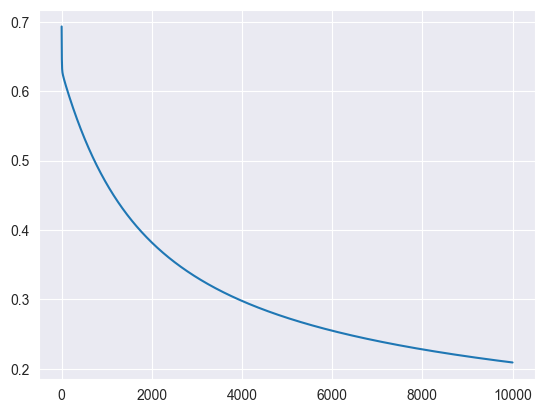

In [133]:
plt.plot(costs)

In [134]:
def plot_decision_boundary(w, b, X, y):
    x1 = np.array([np.min(X[0]), np.max(X[0])])
    x2 = - (b + w[0] * x1) / w[1]
    plt.plot(x1, x2)
    plt.scatter(X[0], X[1], c=y.ravel(), cmap='coolwarm')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()

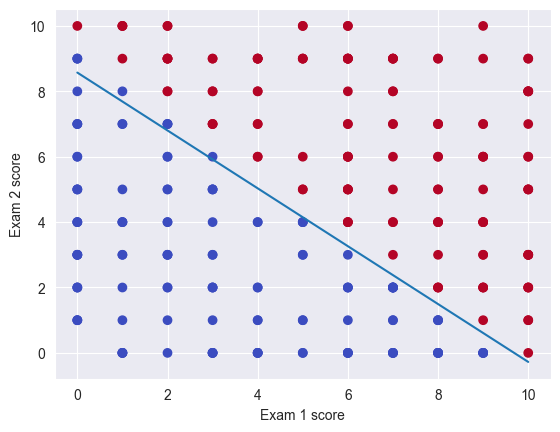

In [135]:
plot_decision_boundary(w, b, X_train, y_train)

<Axes: >

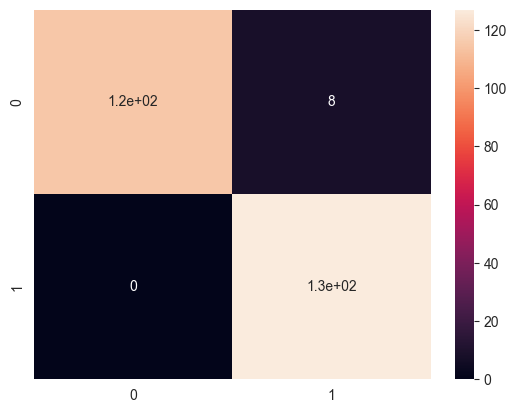

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = predict(w, b, X_train)
cm = confusion_matrix(y_train.ravel(), y_pred.ravel()) 
sns.heatmap(cm, annot=True)
